In [1]:
# test the functionality for the local searches

In [2]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from botorch import fit_gpytorch_mll

from extremasearch.local.localsearch import LocalSearchState, LocalExtremeSearch

In [3]:
def mme_torch(x):
    x = x
    y = torch.zeros(x.shape)
    y += 0.66*(-1.*x + 0.1*torch.sin(30.*x) + torch.exp(-(100.*(x-0.65))**2.))
    y += 0.5 * ( torch.exp(-(100.*(x-0.35))**2.) )
    y += 0.4 * ( torch.exp(-(100.*(x-0.92))**2.) )
    y += 0.73
    return y

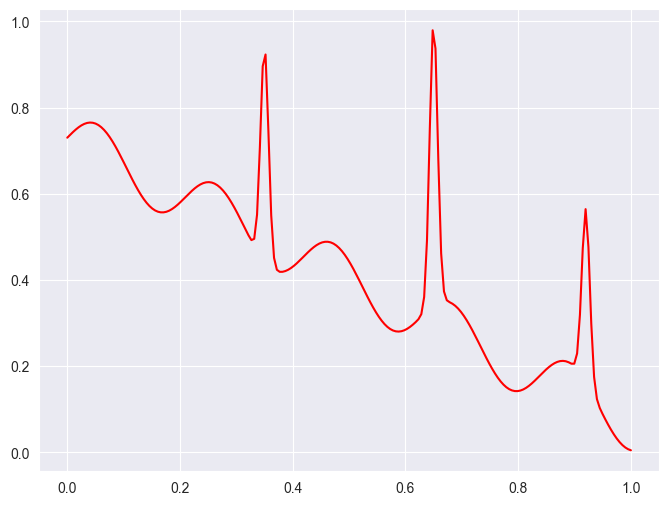

In [4]:
x1 = torch.linspace(0,1.0,200)
y1 = mme_torch(x1)
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.lineplot(x=x1, y=y1, ax=ax, color='r')
None

In [5]:
def outcome_objective(X):
    """wrapper for the outcome objective function"""
    return mme_torch(X).type_as(X)

In [6]:
x_train = torch.DoubleTensor([0.64]).unsqueeze(-1)
y_train = outcome_objective(x_train)
test_local_search_state = LocalSearchState(1,torch.DoubleTensor([0.63,0.7]), x_train, y_train)

In [7]:
test_local_search = LocalExtremeSearch(15, 2, test_local_search_state, outcome_objective)

In [8]:
import warnings
from botorch.exceptions import BadInitialCandidatesWarning
warnings.filterwarnings('ignore', category=BadInitialCandidatesWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

test_local_search.run_local_search()

turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo


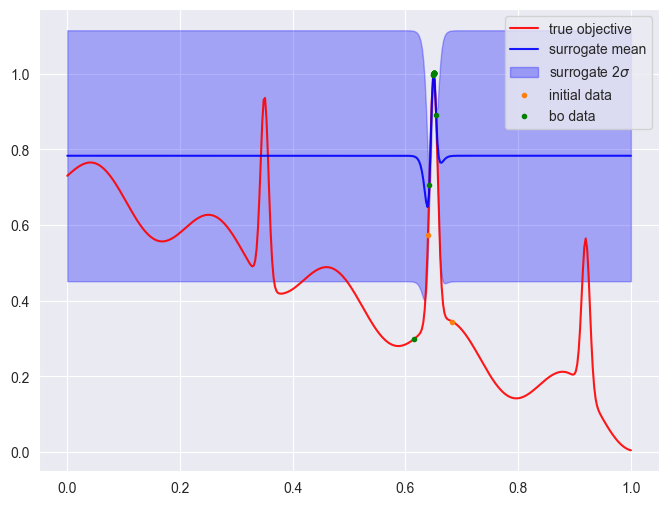

In [10]:
fit_gpytorch_mll(test_local_search.local_state.local_mll)
model = test_local_search.local_state.local_model
x_search = test_local_search.local_state.x_local
y_search = test_local_search.local_state.y_local
# plot the results for local search test
x_test = torch.linspace(0,1,400)
f, ax = plt.subplots(1,1, figsize=(8, 6))
# true objective
ax.plot(x_test.numpy(), outcome_objective(x_test).numpy(), 'r-', alpha=0.9, label='true objective')
# final model
mean_test = model.posterior(x_test.unsqueeze(-1)).mean.detach().numpy()
ax.plot(x_test.numpy(), mean_test, 'b-', alpha=0.9, label='surrogate mean')
var_test = model.posterior(x_test.unsqueeze(-1)).variance.detach().numpy()
sd_test = np.sqrt(var_test)
upper_test = mean_test + 2.0*sd_test
lower_test = mean_test - 2.0*sd_test
ax.fill_between(x_test.numpy(), lower_test.squeeze(), upper_test.squeeze(), color='b', alpha=0.3, label=r'surrogate 2$\sigma$')
# training points
ax.plot(x_search.numpy()[0:2], y_search[0:2].numpy(), '.', color='tab:orange', label='initial data')
ax.plot(x_search.numpy()[2:], y_search[2:].numpy(), '.', color='g', label='bo data')
# ax.set_xlim([0.6,0.7])
# ax.set_ylim([0.0, 1.1])
ax.legend()
None

In [11]:
x_train = torch.DoubleTensor([0.34]).unsqueeze(-1)
y_train = outcome_objective(x_train)
test_local_search_state = LocalSearchState(1,torch.DoubleTensor([0.3,0.4]), x_train, y_train)
test_local_search = LocalExtremeSearch(15, 2, test_local_search_state, outcome_objective)
test_local_search.run_local_search()

turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo


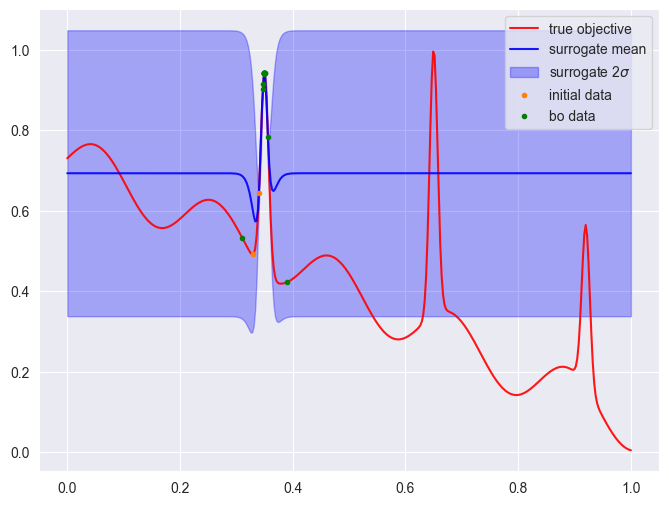

In [12]:
fit_gpytorch_mll(test_local_search.local_state.local_mll)
model = test_local_search.local_state.local_model
x_search = test_local_search.local_state.x_local
y_search = test_local_search.local_state.y_local
# plot the results for local search test
x_test = torch.linspace(0,1,400)
f, ax = plt.subplots(1,1, figsize=(8, 6))
# true objective
ax.plot(x_test.numpy(), outcome_objective(x_test).numpy(), 'r-', alpha=0.9, label='true objective')
# final model
mean_test = model.posterior(x_test.unsqueeze(-1)).mean.detach().numpy()
ax.plot(x_test.numpy(), mean_test, 'b-', alpha=0.9, label='surrogate mean')
var_test = model.posterior(x_test.unsqueeze(-1)).variance.detach().numpy()
sd_test = np.sqrt(var_test)
upper_test = mean_test + 2.0*sd_test
lower_test = mean_test - 2.0*sd_test
ax.fill_between(x_test.numpy(), lower_test.squeeze(), upper_test.squeeze(), color='b', alpha=0.3, label=r'surrogate 2$\sigma$')
# training points
ax.plot(x_search.numpy()[0:2], y_search[0:2].numpy(), '.', color='tab:orange', label='initial data')
ax.plot(x_search.numpy()[2:], y_search[2:].numpy(), '.', color='g', label='bo data')
# ax.set_xlim([0.6,0.7])
# ax.set_ylim([0.0, 1.1])
ax.legend()
None

In [13]:
x_train = torch.DoubleTensor([0.91]).unsqueeze(-1)
y_train = outcome_objective(x_train)
test_local_search_state = LocalSearchState(1,torch.DoubleTensor([0.89,1.0]), x_train, y_train)
test_local_search = LocalExtremeSearch(15, 2, test_local_search_state, outcome_objective)
test_local_search.run_local_search()

turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo
turbo


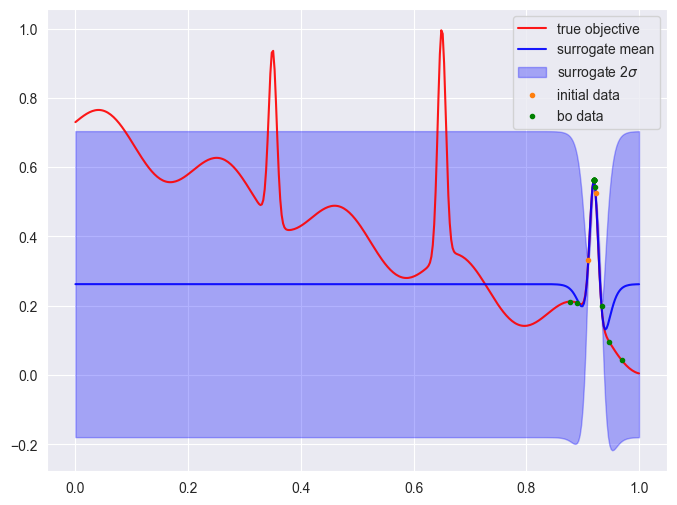

In [14]:
fit_gpytorch_mll(test_local_search.local_state.local_mll)
model = test_local_search.local_state.local_model
x_search = test_local_search.local_state.x_local
y_search = test_local_search.local_state.y_local
# plot the results for local search test
x_test = torch.linspace(0,1,400)
f, ax = plt.subplots(1,1, figsize=(8, 6))
# true objective
ax.plot(x_test.numpy(), outcome_objective(x_test).numpy(), 'r-', alpha=0.9, label='true objective')
# final model
mean_test = model.posterior(x_test.unsqueeze(-1)).mean.detach().numpy()
ax.plot(x_test.numpy(), mean_test, 'b-', alpha=0.9, label='surrogate mean')
var_test = model.posterior(x_test.unsqueeze(-1)).variance.detach().numpy()
sd_test = np.sqrt(var_test)
upper_test = mean_test + 2.0*sd_test
lower_test = mean_test - 2.0*sd_test
ax.fill_between(x_test.numpy(), lower_test.squeeze(), upper_test.squeeze(), color='b', alpha=0.3, label=r'surrogate 2$\sigma$')
# training points
ax.plot(x_search.numpy()[0:2], y_search[0:2].numpy(), '.', color='tab:orange', label='initial data')
ax.plot(x_search.numpy()[2:], y_search[2:].numpy(), '.', color='g', label='bo data')
# ax.set_xlim([0.6,0.7])
# ax.set_ylim([0.0, 1.1])
ax.legend()
None